## Setup

In [47]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Fetch valid aryl ether latent point and MACCSKeys fingerprint

In [44]:
df = pd.read_csv('./data/aryl_ether/valid_output.csv')
active_index = df['0'].to_list()
print('active index:', len(active_index), '\n')


df = pd.read_csv('./data/aryl_ether/index.csv')
index = df['0'].to_list()
print('index:', len(index))

df = pd.read_csv('./data/aryl_ether/latent_group.csv')
total_latent = df['0'].to_list()
print('total molecules:', len(total_latent))
active_latent = []
for i in active_index:
    try:
        active_latent.append(list(map(float, total_latent[index.index(i)].strip('[]').split(', '))))
    except:
        pass
print('active_latent:', len(active_latent), '\n')


df = pd.read_csv('./data/aryl_ether/fp_index.csv')
fp_index = df['0'].to_list()
print('fp index:', len(fp_index))

df = pd.read_csv('./data/aryl_ether/rdk_fp_group.csv')
total_rdk = df['0'].to_list()
print('total molecules:', len(total_rdk))
active_rdk = []
for i in active_index:
    active_rdk.append(list(map(int, total_rdk[fp_index.index(i)].strip('[]').split(', '))))
print('active_rdk:', len(active_rdk))

df = pd.read_csv('./data/aryl_ether/pattern_fp_group.csv')
total_pattern = df['0'].to_list()
print('total molecules:', len(total_pattern))
active_pattern = []
for i in active_index:
    active_pattern.append(list(map(int, total_pattern[fp_index.index(i)].strip('[]').split(', '))))
print('active_pattern:', len(active_pattern))

df = pd.read_csv('./data/aryl_ether/layered_fp_group.csv')
total_layered = df['0'].to_list()
print('total molecules:', len(total_layered))
active_layered = []
for i in active_index:
    active_layered.append(list(map(int, total_layered[fp_index.index(i)].strip('[]').split(', '))))
print('active_layered:', len(active_layered))

df = pd.read_csv('./data/aryl_ether/MACCSKeys_fp_group.csv')
total_MACCSKeys = df['0'].to_list()
print('total molecules:', len(total_MACCSKeys))
active_MACCSKeys = []
for i in active_index:
    active_MACCSKeys.append(list(map(int, total_MACCSKeys[fp_index.index(i)].strip('[]').split(', '))))
print('active_MACCSKeys:', len(active_MACCSKeys))

active index: 728 

index: 1578
total molecules: 1578
active_latent: 714 

fp index: 1644
total molecules: 1650
active_rdk: 728
total molecules: 1650
active_pattern: 728
total molecules: 1650
active_layered: 728
total molecules: 1650
active_MACCSKeys: 728


## Fetch 5,000 Asinex molecules latent group and fingerprint

In [43]:
print('fetching latent...')
df = pd.read_csv('./data/mao/latent_group.csv')
latent_group = []
for i in range(5000):
    latent_group.append(list(map(float, df['0'].to_list()[i].strip('[]').split(', '))))
print('latent fetched:', len(latent_group))

print('fetching rdk fp...')
df = pd.read_csv('./data/mao/batched_rdk_fp_group.csv')
rdk_fp_group = []
for i in range(len(df)):
    rdk_fp_group.append(list(map(int, df['0'].to_list()[i].strip('[]').split(', '))))
print('rdk fetched:', len(rdk_fp_group))

print('fetching pattern...')
df = pd.read_csv('./data/mao/batched_pattern_fp_group.csv')
pattern_fp_group = []
for i in range(len(df)):
    pattern_fp_group.append(list(map(int, df['0'].to_list()[i].strip('[]').split(', '))))
print('pattern fetched:', len(pattern_fp_group))

print('fetching layered...')
df = pd.read_csv('./data/mao/batched_layered_fp_group.csv')
layered_fp_group = []
for i in range(len(df)):
    layered_fp_group.append(list(map(int, df['0'].to_list()[i].strip('[]').split(', '))))
print('layered fetched:', len(layered_fp_group))

print('fetching MACCSKeys...')
df = pd.read_csv('./data/mao/batched_MACCKeys_fp_group.csv')
MACCSKeys_fp_group = []
for i in range(len(df)):
    MACCSKeys_fp_group.append(list(map(int, df['0'].to_list()[i].strip('[]').split(', '))))
print('MACCSKeys fetched:', len(MACCSKeys_fp_group))

fetching latent...
latent fetched: 5000
fetching rdk fp...
rdk fetched: 5182
fetching pattern...
pattern fetched: 5182
fetching layered...
layered fetched: 5182
fetching MACCSKeys...
MACCSKeys fetched: 5182


## tsne and learn

In [51]:
n_components = 2
tsne_model = TSNE(n_components=n_components) 
pca_model = PCA(n_components=n_components)

print('(1/10)')
points_latent_tsne = tsne_model.fit_transform(active_latent + latent_group)
print('(2/10)')
points_latent_pca = pca_model.fit_transform(active_latent + latent_group)
print('(3/10)')
points_rdk_fp_tsne = tsne_model.fit_transform(active_rdk + rdk_fp_group)
print('(4/10)')
points_rdk_fp_pca = pca_model.fit_transform(active_rdk + rdk_fp_group)
print('(5/10)')
points_pattern_fp_tsne = tsne_model.fit_transform(active_pattern + pattern_fp_group)
print('(6/10)')
points_pattern_fp_pca = pca_model.fit_transform(active_pattern + pattern_fp_group)
print('(7/10)')
points_layered_fp_tsne = tsne_model.fit_transform(active_layered + layered_fp_group)
print('(8/10)')
points_layered_fp_pca = pca_model.fit_transform(active_layered + layered_fp_group)
print('(9/10)')
points_MACCSKeys_fp_tsne = tsne_model.fit_transform(active_MACCSKeys + MACCSKeys_fp_group)
print('(10/10)')
points_MACCSKeys_fp_pca = pca_model.fit_transform(active_MACCSKeys + MACCSKeys_fp_group)

(1/10)
(2/10)
(3/10)
(4/10)
(5/10)
(6/10)
(7/10)
(8/10)
(9/10)
(10/10)


## plot

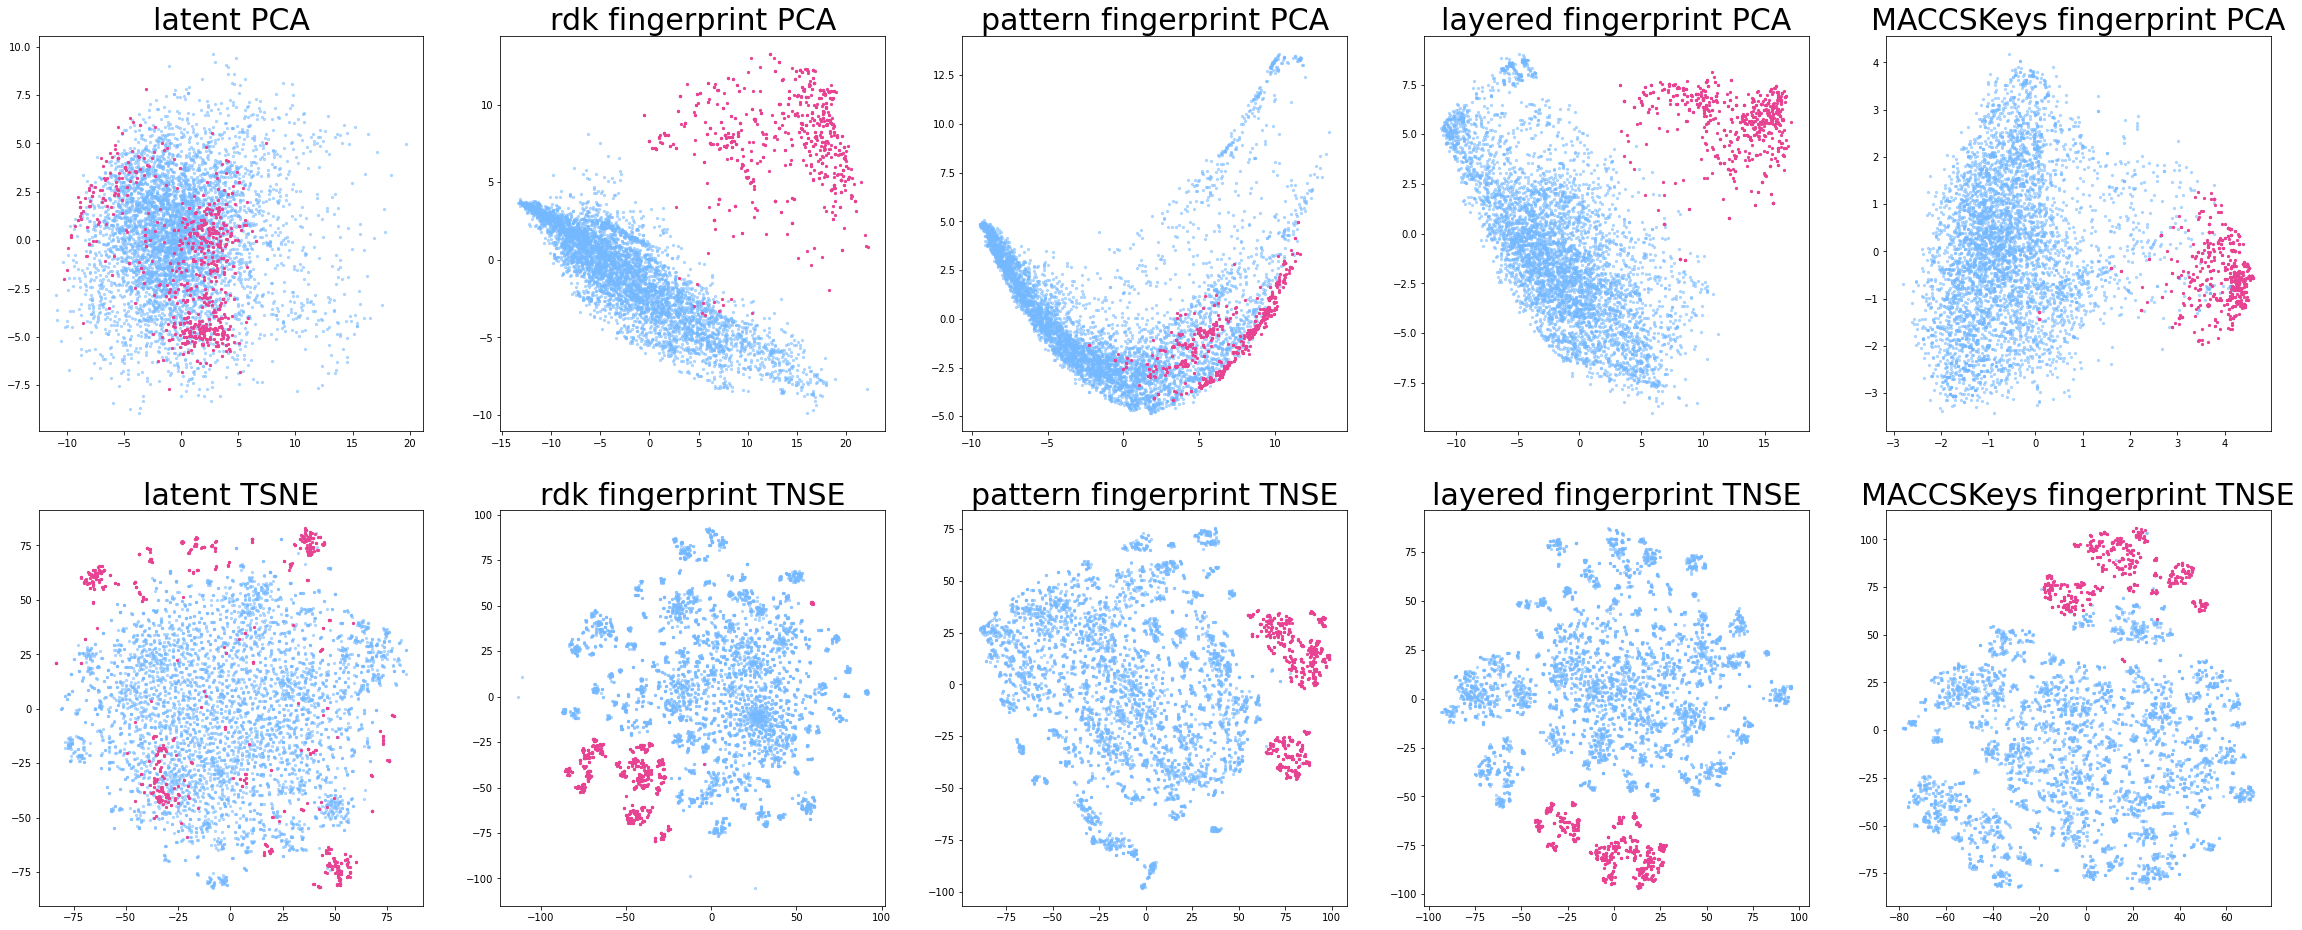

In [53]:
x1 = [ point[0] for point in points_latent_pca ]
y1 = [ point[1] for point in points_latent_pca ]

x2 = [ point[0] for point in points_latent_tsne ]
y2 = [ point[1] for point in points_latent_tsne ]

x3 = [ point[0] for point in points_rdk_fp_pca ]
y3 = [ point[1] for point in points_rdk_fp_pca ]

x4 = [ point[0] for point in points_rdk_fp_tsne ]
y4 = [ point[1] for point in points_rdk_fp_tsne ]

x5 = [ point[0] for point in points_pattern_fp_pca ]
y5 = [ point[1] for point in points_pattern_fp_pca ]

x6 = [ point[0] for point in points_pattern_fp_tsne ]
y6 = [ point[1] for point in points_pattern_fp_tsne ]

x7 = [ point[0] for point in points_layered_fp_pca ]
y7 = [ point[1] for point in points_layered_fp_pca ]

x8 = [ point[0] for point in points_layered_fp_tsne ]
y8 = [ point[1] for point in points_layered_fp_tsne ]

x9 = [ point[0] for point in points_MACCSKeys_fp_pca ]
y9 = [ point[1] for point in points_MACCSKeys_fp_pca ]

x10 = [ point[0] for point in points_MACCSKeys_fp_tsne ]
y10 = [ point[1] for point in points_MACCSKeys_fp_tsne ]

alpha1 = 1.0 
alpha0 = 0.5
size1 = 5
size0 = 5
color1 = '#e84393'
color0 = '#74b9ff'
bg_color = '#ffffff' # '#CAD3C8'
fontsize = 30

cmap = plt.cm.get_cmap('cool', 2)

fig, ax = plt.subplots(5, 2)
fig.set_size_inches((40, 16))
plt.rcParams['axes.facecolor'] = bg_color

plt.subplot(251)
plt.scatter(x1[len(active_latent):], y1[len(active_latent):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x1[:len(active_latent)], y1[:len(active_latent)], c=color1, s=size1, alpha=alpha1)
plt.title('latent PCA', fontsize=fontsize)

plt.subplot(256)
plt.scatter(x2[len(active_latent):], y2[len(active_latent):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x2[:len(active_latent)], y2[:len(active_latent)], c=color1, s=size1, alpha=alpha1)
plt.title('latent TSNE', fontsize=fontsize)

plt.subplot(252)
plt.scatter(x3[len(active_rdk):], y3[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x3[:len(active_rdk)], y3[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint PCA', fontsize=fontsize)

plt.subplot(257)
plt.scatter(x4[len(active_rdk):], y4[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x4[:len(active_rdk)], y4[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('rdk fingerprint TNSE', fontsize=fontsize)

plt.subplot(253)
plt.scatter(x5[len(active_rdk):], y5[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x5[:len(active_rdk)], y5[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint PCA', fontsize=fontsize)

plt.subplot(258)
plt.scatter(x6[len(active_rdk):], y6[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x6[:len(active_rdk)], y6[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('pattern fingerprint TNSE', fontsize=fontsize)

plt.subplot(254)
plt.scatter(x7[len(active_rdk):], y7[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x7[:len(active_rdk)], y7[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint PCA', fontsize=fontsize)

plt.subplot(259)
plt.scatter(x8[len(active_rdk):], y8[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x8[:len(active_rdk)], y8[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('layered fingerprint TNSE', fontsize=fontsize)

plt.subplot(255)
plt.scatter(x9[len(active_rdk):], y9[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x9[:len(active_rdk)], y9[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('MACCSKeys fingerprint PCA', fontsize=fontsize)

plt.subplot(2, 5,10)
plt.scatter(x10[len(active_rdk):], y10[len(active_rdk):], c=color0, s=size0, alpha=alpha0)
plt.scatter(x10[:len(active_rdk)], y10[:len(active_rdk)], c=color1, s=size1, alpha=alpha1)
plt.title('MACCSKeys fingerprint TNSE', fontsize=fontsize)

plt.show()